In [214]:
import pandas as pd 
import pandas_datareader.data as reader
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [215]:
#df = pd.read_csv('datasets/CAKE.csv')
df = reader.get_data_yahoo('LVGO')
df = df.reset_index()
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
258,2020-08-03,136.860001,128.100006,131.240005,136.630005,4608700,136.630005
259,2020-08-04,149.839996,138.179993,140.970001,144.529999,10867300,144.529999
260,2020-08-05,150.000000,124.129997,149.899994,128.059998,31630500,128.059998
261,2020-08-06,137.399994,131.520004,135.089996,134.350006,8022500,134.350006
262,2020-08-07,136.000000,121.500000,134.350006,121.550003,5503992,121.550003


In [216]:
# end = dt.datetime.now()
# start = dt.datetime(end.year - 2, end.month, end.day)

In [217]:
# df = reader.get_data_yahoo('CAKE',start,end)
# df

In [218]:
from fbprophet import Prophet

In [219]:
model = Prophet()
df = df.reset_index()
df[['ds','y']] = df[['Date','Adj Close']]
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


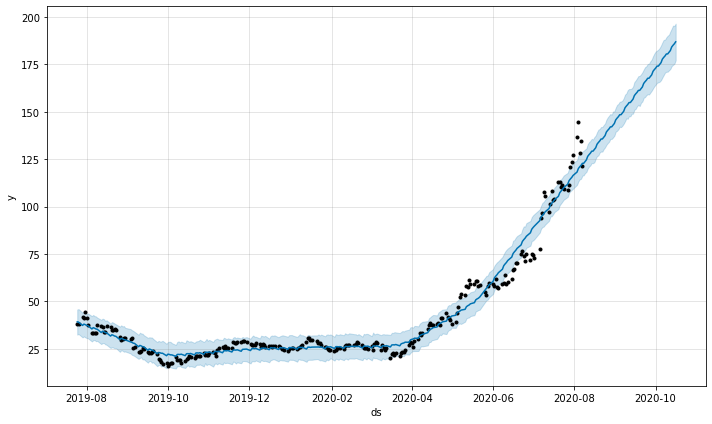

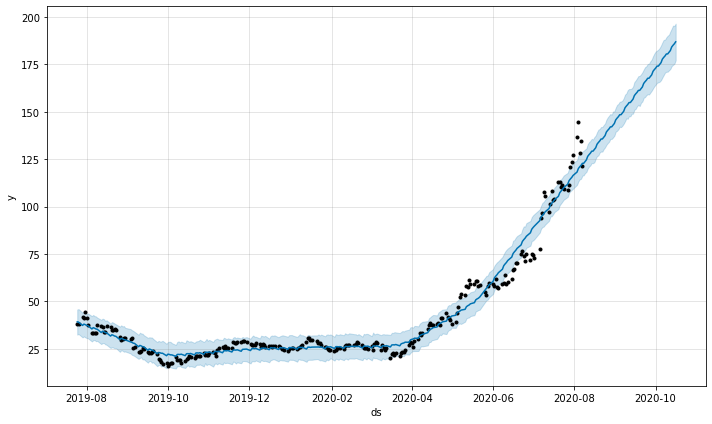

In [250]:
future = model.make_future_dataframe(periods=70, freq='D')
forecast = model.predict(future)
model.plot(forecast)

In [251]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [252]:
forecast[['ds','yhat_lower','yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,2019-07-25,32.451736,45.728626,39.195719
1,2019-07-26,32.776760,45.926861,39.050276
2,2019-07-29,31.008164,43.945547,37.312016
3,2019-07-30,31.510553,44.454094,37.996763
4,2019-07-31,31.050856,44.354052,37.724756
...,...,...,...,...
328,2020-10-12,172.599545,192.357652,182.307864
329,2020-10-13,174.104226,193.841639,184.175570
330,2020-10-14,174.760778,195.447629,185.086522
331,2020-10-15,175.292891,195.272228,185.868841


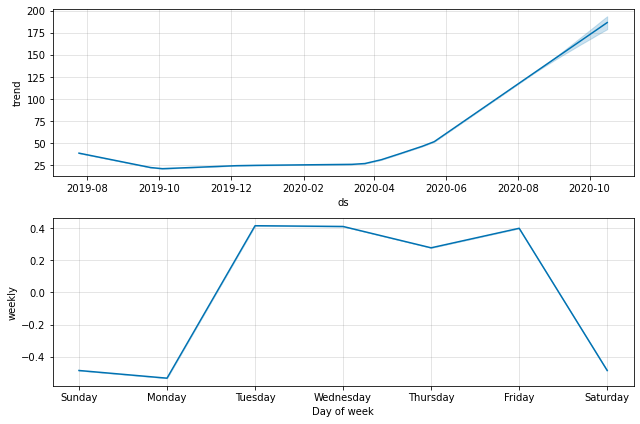

In [253]:
model.plot_components(forecast);

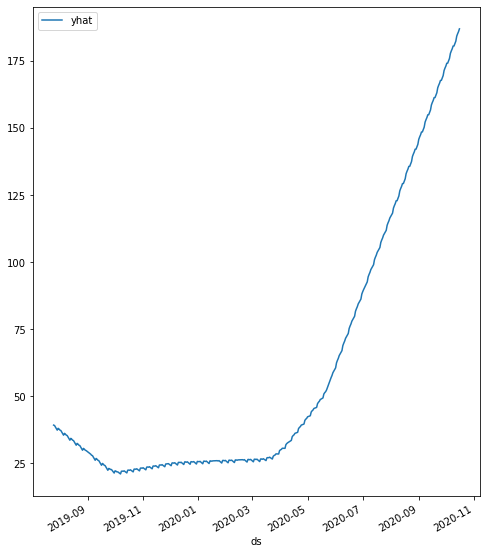

In [254]:
forecast.plot(x='ds', y='yhat',figsize=(8,10))

### Evaluation Metrics

In [225]:
df = pd.read_csv('datasets/CAKE.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2020-07-31,25.469999,25.730000,23.670000,24.000000,24.000000,2115800
249,2020-08-03,23.370001,23.570000,22.750000,23.250000,23.250000,1980800
250,2020-08-04,23.410000,24.500000,23.400000,23.790001,23.790001,1712400
251,2020-08-05,24.350000,24.629999,23.870001,24.150000,24.150000,1346600
252,2020-08-06,24.150000,25.309999,23.809999,25.070000,25.070000,1783900


In [226]:
df[['ds','y']] = df[['Date','Adj Close']]
data = df[['ds','y']]
data

,ds,y
0,2019-08-07,39.415188
1,2019-08-08,40.065956
2,2019-08-09,38.900398
3,2019-08-12,37.899967
4,2019-08-13,38.399937
...,...,...
248,2020-07-31,24.000000
249,2020-08-03,23.250000
250,2020-08-04,23.790001
251,2020-08-05,24.150000


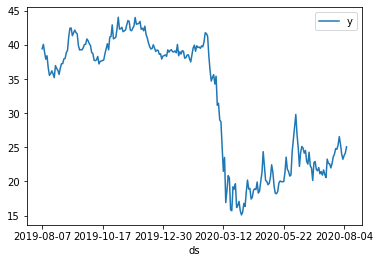

In [227]:
data.plot(x='ds', y='y')

In [228]:
len(data)-30

223

In [229]:
train = data.iloc[:193]
test = data.iloc[193:]


In [230]:
len(train)-30

163

In [231]:
test

,ds,y
193,2020-05-13,18.270000
194,2020-05-14,18.200001
195,2020-05-15,18.520000
196,2020-05-18,19.770000
197,2020-05-19,20.070000
198,2020-05-20,19.959999
199,2020-05-21,19.959999
200,2020-05-22,19.969999
201,2020-05-26,21.299999
202,2020-05-27,23.559999


In [232]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


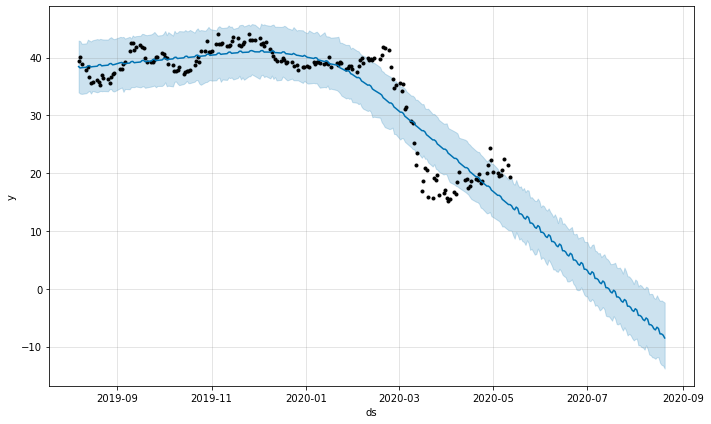

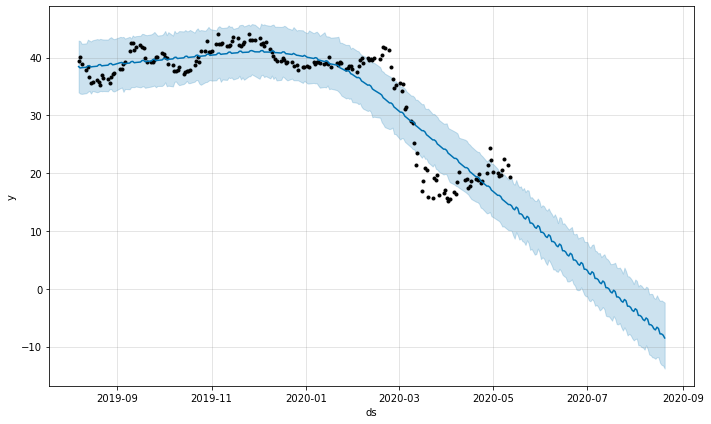

In [233]:
m.plot(forecast)

In [234]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
288,2020-08-16,-7.314286,-11.861126,-1.717264,-10.125962,-4.375253,0.439161,0.439161,0.439161,0.439161,0.439161,0.439161,0.0,0.0,0.0,-6.875125
289,2020-08-17,-7.542606,-12.797461,-2.117746,-10.400517,-4.551724,-0.264137,-0.264137,-0.264137,-0.264137,-0.264137,-0.264137,0.0,0.0,0.0,-7.806743
290,2020-08-18,-7.770925,-13.169272,-2.014914,-10.681987,-4.717714,-0.041086,-0.041086,-0.041086,-0.041086,-0.041086,-0.041086,0.0,0.0,0.0,-7.812011
291,2020-08-19,-7.999245,-13.287419,-2.196823,-10.961258,-4.893158,-0.022998,-0.022998,-0.022998,-0.022998,-0.022998,-0.022998,0.0,0.0,0.0,-8.022242
292,2020-08-20,-8.227565,-13.804772,-2.388592,-11.240530,-5.051613,-0.287224,-0.287224,-0.287224,-0.287224,-0.287224,-0.287224,0.0,0.0,0.0,-8.514788


In [235]:
%matplotlib inline

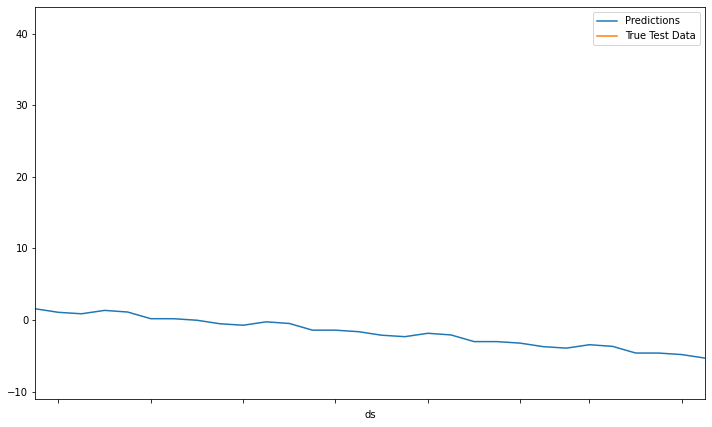

In [243]:
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True, figsize=(12,8))
# lowerbound and upper bound of test data
test.plot(x='ds', y='y', label='True Test Data', legend=True,ax=ax, xlim=('2020-07-08', '2020-08-06'))

In [244]:
from statsmodels.tools.eval_measures import rmse 

In [245]:
predictions = forecast.iloc[-60:]['yhat']

In [246]:
predictions

233    4.979154
234    4.973886
235    4.763655
236    4.271109
237    4.067136
238    4.540854
239    4.312535
240    3.380917
241    3.375649
242    3.165417
243    2.672872
244    2.468898
245    2.942617
246    2.714297
247    1.782679
248    1.777412
249    1.567180
250    1.074635
251    0.870661
252    1.344380
253    1.116060
254    0.184442
255    0.179174
256   -0.031057
257   -0.523603
258   -0.727576
259   -0.253857
260   -0.482177
261   -1.413795
262   -1.419063
263   -1.629294
264   -2.121840
265   -2.325813
266   -1.852094
267   -2.080414
268   -3.012032
269   -3.017300
270   -3.227531
271   -3.720077
272   -3.924050
273   -3.450331
274   -3.678651
275   -4.610269
276   -4.615537
277   -4.825768
278   -5.318314
279   -5.522287
280   -5.048569
281   -5.276888
282   -6.208506
283   -6.213774
284   -6.424005
285   -6.916551
286   -7.120524
287   -6.646806
288   -6.875125
289   -7.806743
290   -7.812011
291   -8.022242
292   -8.514788
Name: yhat, dtype: float64

In [247]:
rmse(predictions,test['y'])

24.89780984524806

In [248]:
test.mean()

y    22.830333
dtype: float64

In [249]:
from fbprophet.diagnostics import cross_validation, performance_metrics 
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
#